## Machine Learning - Clustering Model for Customer Segmentation

### Problem Statement

The goal of this project is to build a K-Means clustering with Python and Scikit-Learn using demograhpic and behavioral data from Data Techcon's Google Analytics account, to help the company improve how to predict user's behavior. Finally, create a marketing strategy on how to improve overall customer behavior and shopping pattern. This is a demographic customer segmentation use case

In [85]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [86]:
# Load the dataset
df = pd.read_csv('/Users/tobeo/Documents/Datasets/Custseg_GA.csv')

In [87]:
df.head()

,Date,Gender,Region,Device Category,Age,Users,Transactions
0,20220507,male,New York,desktop,25-34,287,0
1,20220506,male,New York,desktop,25-34,250,4
2,20220927,male,California,desktop,25-34,234,265
3,20220926,male,California,desktop,25-34,204,163
4,20221207,male,California,desktop,25-34,144,64


In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 732 entries, 0 to 731
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Date             732 non-null    int64 
 1   Gender           732 non-null    object
 2   Region           732 non-null    object
 3   Device Category  732 non-null    object
 4   Age              732 non-null    object
 5   Users            732 non-null    int64 
 6   Transactions     732 non-null    int64 
dtypes: int64(3), object(4)
memory usage: 40.2+ KB


In [89]:
df.shape

(732, 7)

In [90]:
df.describe()

,Date,Users,Transactions
count,7.320000e+02,732.000000,732.000000
mean,2.021788e+07,53.923497,26.463115
std,4.493583e+03,22.625292,22.386482
min,2.021013e+07,38.000000,0.000000
25%,2.021120e+07,42.000000,11.000000
50%,2.022052e+07,49.000000,23.000000
75%,2.022093e+07,60.000000,34.000000
max,2.022122e+07,287.000000,265.000000


### Data Preprocessing

In [91]:
df.isnull()

,Date,Gender,Region,Device Category,Age,Users,Transactions
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
727,False,False,False,False,False,False,False
728,False,False,False,False,False,False,False
729,False,False,False,False,False,False,False
730,False,False,False,False,False,False,False


In [92]:
df.isnull().sum()

Date               0
Gender             0
Region             0
Device Category    0
Age                0
Users              0
Transactions       0
dtype: int64

In [93]:
df = df.drop(['Date'], axis=1)

In [94]:
df.head()

,Gender,Region,Device Category,Age,Users,Transactions
0,male,New York,desktop,25-34,287,0
1,male,New York,desktop,25-34,250,4
2,male,California,desktop,25-34,234,265
3,male,California,desktop,25-34,204,163
4,male,California,desktop,25-34,144,64


#### Convert categorical variable to numeric

In [95]:
# Convert 'Age' to float
df['Age'] = df['Age'].apply(lambda x: sum(map(int, x.split('-'))) / 2 if '-' in x else float(x))

# Print the updated dataframe
print(df.head())

  Gender      Region Device Category   Age  Users  Transactions
0   male    New York         desktop  29.5    287             0
1   male    New York         desktop  29.5    250             4
2   male  California         desktop  29.5    234           265
3   male  California         desktop  29.5    204           163
4   male  California         desktop  29.5    144            64


-  use the apply() function to apply a lambda function to each value in the 'Age' column. If a value contains a '-', it means it's a range, so we split the value at '-' and calculate the average. Otherwise, we convert the value to float directly.
- Lambda used for simple, one-line functions  lambda function is used within the apply() method to convert the 'Age' values to float. Let's break down the lambda function:

### Building Machine Learning Model

In [96]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

In [97]:
# Select the features for clustering
X = df[['Age', 'Users', 'Transactions']].values

In [98]:
# Perform data preprocessing
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [99]:
# Determine the optimal number of clusters using the elbow method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

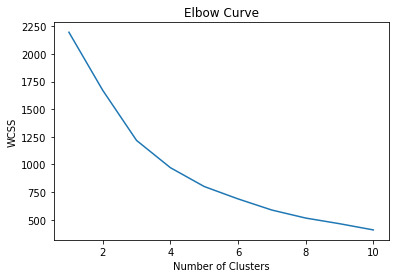

In [100]:
# Plot the elbow curve to visualize the optimal number of clusters
import matplotlib.pyplot as plt
plt.plot(range(1, 11), wcss)
plt.title('Elbow Curve')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()


In [156]:
# Based on the elbow curve, select the optimal number of clusters
n_clusters = 3  # Adjust this based on the elbow curve

In [157]:
# Build the K-means clustering model
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans.fit(X_scaled)

KMeans(n_clusters=3, random_state=42)

In [158]:
# Assign the clusters to the data points
df['Cluster'] = kmeans.labels_

In [159]:
# Print the cluster centers
cluster_centers = scaler.inverse_transform(kmeans.cluster_centers_)
print("Cluster Centers:")
print(cluster_centers)

Cluster Centers:
[[ 26.82857143  50.95535714  24.00357143]
 [ 40.82352941  49.21323529  23.07352941]
 [ 28.91666667 117.88888889  77.52777778]]


In [161]:
#Evaluate the model performance using inertia metric
kmeans.inertia_

1216.9423676157676

In [162]:
# Based on the elbow curve, select the optimal number of clusters
n_clusters = 7  # Adjust this based on the elbow curve

In [163]:
# Build the K-means clustering model
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans.fit(X_scaled)

KMeans(n_clusters=7, random_state=42)

In [164]:
# Assign the clusters to the data points
df['Cluster'] = kmeans.labels_

In [165]:
#Print the cluster centers
cluster_centers = scaler.inverse_transform(kmeans.cluster_centers_)
print("Cluster Centers:")
print(cluster_centers)

Cluster Centers:
[[ 28.88135593  86.96610169  20.37288136]
 [ 29.5         46.53053435  18.23664122]
 [ 29.53240741  59.84259259  53.75925926]
 [ 28.39285714 131.57142857 115.42857143]
 [ 40.92857143  47.3968254   21.17460317]
 [ 21.          45.56521739  20.47826087]
 [ 29.5        268.5          2.        ]]


In [135]:
kmeans.inertia_

514.6528591046088

### Key Insight on Inertia


- Inertia is a measure of how internally coherent the clusters are. It calculates the sum of squared distances of samples to their closest cluster center. Inertia values are problem-specific and depend on the scale and nature of the dataset. There is no universally "great" inertia score as it varies from dataset to dataset.

- Lower inertia values generally indicate better clustering performance, as it suggests that the samples within each cluster are closer to their respective cluster centers. The relative goodness of inertia scores can be assessed by comparing them to other inertia values within the same dataset.

- It is important to note that inertia alone may not provide a complete assessment of clustering performance. It should be used in combination with other evaluation metrics and domain knowledge to make informed decisions about the quality of the clusters. Additionally, the interpretability and usefulness of the resulting clusters should also be considered in evaluating the performance of the model.

In [105]:
# Perform cluster analysis
cluster_analysis = df.groupby('Cluster').mean()
print("Cluster Analysis:")
print(cluster_analysis)

Cluster Analysis:
               Age       Users  Transactions
Cluster                                     
0        26.828571   50.955357     24.003571
1        40.823529   49.213235     23.073529
2        28.916667  117.888889     77.527778


#### clusters visual using a scatter plot to show the relationship between age and transaction 

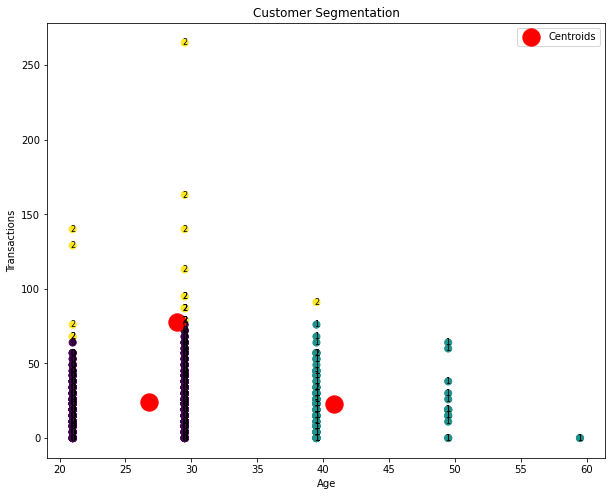

In [106]:
fig, ax = plt.subplots(figsize=(10, 8))  # Adjust the figsize as per your preference

# Visualize the clusters with cluster labels
plt.scatter(X[:, 0], X[:, 2], c=kmeans.labels_, cmap='viridis', s=50)  # Increase marker size by changing 's' value
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 2], s=300, c='red', label='Centroids')

# Add cluster labels
for i, txt in enumerate(kmeans.labels_):
    plt.annotate(txt, (X[i, 0], X[i, 2]), fontsize=8, color='black', ha='center', va='center')

plt.title('Customer Segmentation')
plt.xlabel('Age')
plt.ylabel('Transactions')
plt.legend()
plt.show()


#### Interpreting the scatter plot chart

- The x-axis represents the 'Age' of the customers, and the y-axis represents the 'Transactions' made by the customers.
- Each data point in the scatter plot represents a customer.
- The different colors represent different clusters assigned by the K-means algorithm.
- The yellow color clusters, located at the top of the plot, indicate a segment of customers who are relatively younger and have higher transaction values.
- The distribution and clustering of data points can provide insights into the relationships between age and transaction behavior.
- Other clusters represented by different colors may indicate different segments of customers based on their age and transaction patterns.

#### Let's identify the clusters color

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


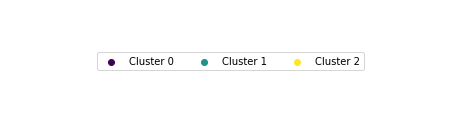

In [107]:
# Get unique cluster labels
unique_labels = np.unique(kmeans.labels_)

# Assign a color to each unique cluster label
colors = plt.cm.viridis(np.linspace(0, 1, len(unique_labels)))

# Create a color map legend
plt.figure(figsize=(8, 2))
for i, label in enumerate(unique_labels):
    plt.scatter([], [], c=colors[i], label='Cluster {}'.format(label))

plt.legend(loc='center', ncol=len(unique_labels))
plt.axis('off')
plt.show()

- The yellow color clusters being at the top indicate that they have higher values for both 'Age' and 'Transactions'.

#### Let's find the cluster with highest transactions

In [108]:
highest_transaction_cluster = cluster_analysis['Transactions'].idxmax()
highest_transaction_value = cluster_analysis.loc[highest_transaction_cluster, 'Transactions']

print("Cluster with the Highest Transaction:")
print("Cluster:", highest_transaction_cluster)
print("Average Transaction Value:", highest_transaction_value)


Cluster with the Highest Transaction:
Cluster: 2
Average Transaction Value: 77.52777777777777


#### Find the customer age group in cluster 2

In [109]:
cluster_2_ages = df.loc[df['Cluster'] == 2, 'Age']

print("Ages in Cluster 2:")
print(cluster_2_ages)


Ages in Cluster 2:
0      29.5
1      29.5
2      29.5
3      29.5
4      29.5
5      21.0
6      29.5
7      29.5
8      29.5
9      21.0
10     29.5
11     29.5
14     29.5
15     29.5
16     29.5
18     39.5
19     39.5
20     29.5
21     29.5
24     21.0
26     29.5
27     29.5
29     29.5
30     39.5
33     29.5
34     21.0
35     29.5
66     21.0
70     21.0
72     29.5
95     29.5
97     29.5
99     29.5
125    29.5
144    29.5
155    29.5
Name: Age, dtype: float64


### Interpreting Insights

Interpreting the insights from clustering models requires analyzing the characteristics of each cluster and understanding the patterns and differences between them. Here are some general steps to interpret the insights from clustering models:

- Cluster Characteristics: Examine the cluster centers or centroids to understand the average values of the features within each cluster. Look for distinct patterns or differences in feature values between clusters. For example, in customer segmentation based on age, users, and transactions, you might find clusters with high transaction numbers and user counts, indicating frequent and engaged customers.

- Cluster Analysis: Perform further analysis on each cluster to understand their unique characteristics. Calculate the mean, median, or other relevant statistics for each feature within each cluster. Compare the values across clusters to identify differences and similarities. For instance, you may find that a particular age group has higher transaction numbers and user counts compared to others.

- Visualization: Visualize the clusters to gain a better understanding of the patterns. Plotting the data points in a scatter plot with different colors for each cluster can help identify clusters' boundaries and their relationships with specific features.

- Business Context: Interpret the insights within the context of your business or domain knowledge. Consider how the identified clusters relate to your business objectives or marketing strategies. For example, if you discover a cluster with high transaction numbers but low user counts, it may indicate an opportunity to focus on customer retention or increasing user engagement.

- Actionable Insights: Translate the insights into actionable recommendations for decision-makers or stakeholders. Identify the key findings and propose strategies or initiatives based on the cluster characteristics. For instance, you might suggest targeting specific age groups or developing tailored marketing campaigns for customers with certain transaction behaviors.

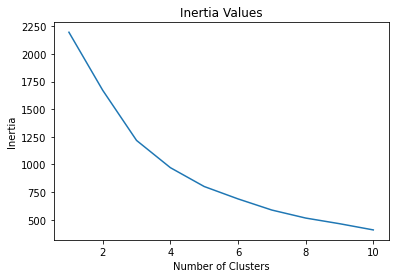

In [110]:
# Get the inertia values
inertia_values = wcss

# Plot the inertia values
plt.plot(range(1, 11), inertia_values)
plt.title('Inertia Values')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()


In [111]:
kmeans.inertia_

1216.9423676157676

### Key Insights

- we can observe the average age and transaction values for each cluster. This provides valuable insights into the age groups and transaction patterns of your customers. For example, we can see that Cluster 2 has a relatively higher average age and transaction values, while Cluster 1 and Cluster 3 have lower average values in comparison.

- Cluster 1 has the highest average user count among the clusters. This implies that customers in Cluster 1 are highly engaged and active users of your products or services.

- Scatter plot shows the relationship between age and transaction values. Each data point represents a customer, and the color represents the assigned cluster. Additionally, the red points indicate the cluster centers, representing the average age and transaction values of each cluster.



### Marketing Strategy Recommendation

- Personalized Offers: Develop personalized offers or discounts tailored to the preferences and needs of customers in Cluster 2. Analyze their transaction history and purchase patterns to identify specific products or categories they are interested in, and create targeted promotions to incentivize further purchases.

- Loyalty Programs: Implement a loyalty program specifically designed for customers in Cluster 2. Reward their high transaction values with exclusive benefits, such as VIP access, early product launches, or additional discounts on future purchases. This can help strengthen their loyalty and encourage repeat transactions.

- Upselling and Cross-selling: Leverage the high transaction values of customers in Cluster 2 by recommending complementary products or upselling higher-priced items. Identify product associations or common purchase patterns within this cluster and use personalized recommendations to promote additional products that align with their preferences.

- Exclusive Events or Experiences: Organize exclusive events or experiences for customers in Cluster 2 to foster a sense of exclusivity and strengthen their engagement. This could include VIP shopping events, product demonstrations, or invitation-only sales events. Providing unique experiences can enhance their connection with your brand and increase their likelihood of making additional high-value transactions.

- Personalized Communication: Craft personalized communication strategies to engage with customers in Cluster 2. Use targeted email marketing, personalized recommendations, and tailored content to keep them informed about new products, promotions, and special offers. By delivering relevant and customized messages, you can enhance their shopping experience and encourage ongoing transactions.

- Feedback and Surveys: Regularly seek feedback from customers in Cluster 2 to understand their preferences, expectations, and pain points. Conduct surveys or collect reviews to gather insights on how to further improve their experience. Actively listen to their feedback and use it to refine your marketing strategies and offerings.